<a href="https://colab.research.google.com/github/fboldt/aulas-am-bsi/blob/main/aula07b_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
from  sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
dataset=load_wine()
X, y = dataset.data, dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

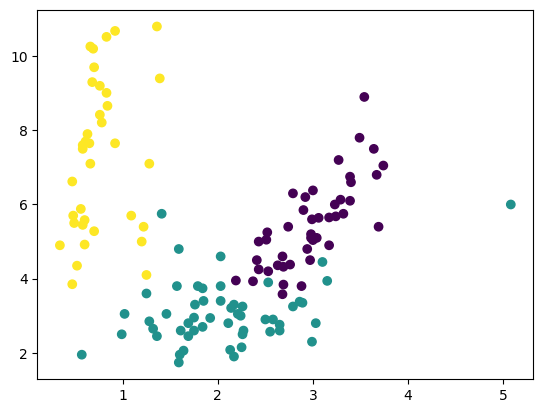

In [72]:
import matplotlib.pyplot as plt

def plot_dataset(X, y):
  plt.scatter(X[:, 0], X[:, 1], c=y)

feats = [6, 9]
plot_dataset(X_train[:,feats], y_train)

In [73]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

class K1nnClassifier(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        self.X = X
        self.y = y
        return self

    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            distances = np.linalg.norm(self.X - X[i], axis=1)
            min_index = np.argmin(distances)
            y_pred[i] = self.y[min_index]
        return y_pred

model = K1nnClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7777777777777778


In [74]:
model.fit(X_train[:,feats], y_train)
y_pred = model.predict(X_test[:,feats])
print(accuracy_score(y_test, y_pred))

0.9555555555555556


In [75]:
import numpy as np

def define_axes(X):
    offset = 0.5
    min1, max1 = X[:, 0].min(), X[:, 0].max()
    min2, max2 = X[:, 1].min(), X[:, 1].max()
    return [min1-offset, max1+offset, min2-offset, max2+offset]

def plot_predictions(clf, X):
    axes = define_axes(X)
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

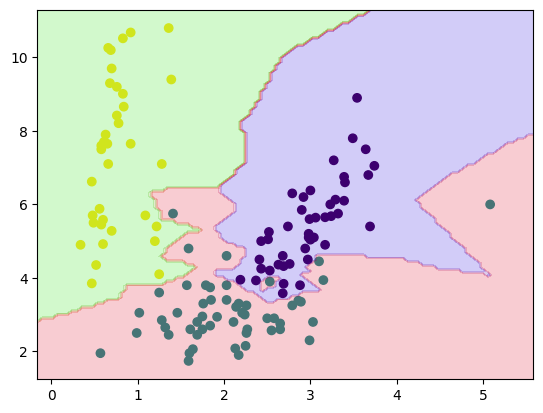

In [76]:
plot_dataset(X_train[:,feats], y_train)
plot_predictions(model, X_train[:,feats])

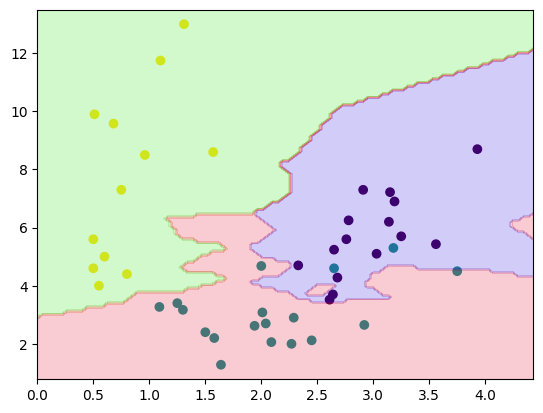

In [77]:
plot_dataset(X_test[:,feats], y_test)
plot_predictions(model, X_test[:,feats])

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.89      0.94        18
           2       1.00      1.00      1.00        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [79]:
from sklearn.model_selection import cross_validate
from pprint import pprint

scores = cross_validate(model, X, y, cv=5, scoring='accuracy')
pprint(scores)
print(np.mean(scores['test_score']))

{'fit_time': array([0.00145578, 0.0001905 , 0.00022817, 0.00019026, 0.00017786]),
 'score_time': array([0.00237131, 0.00219464, 0.00575447, 0.00219059, 0.00740719]),
 'test_score': array([0.80555556, 0.80555556, 0.55555556, 0.8       , 0.2       ])}
0.6333333333333334


In [80]:
scores = cross_validate(model, X[:,feats], y, cv=5, scoring='accuracy')
pprint(scores)
print(np.mean(scores['test_score']))

{'fit_time': array([0.00043583, 0.00018406, 0.00017715, 0.00020456, 0.00015855]),
 'score_time': array([0.00290537, 0.00201464, 0.00203061, 0.00194836, 0.00188231]),
 'test_score': array([0.88888889, 0.88888889, 0.97222222, 0.82857143, 0.82857143])}
0.8814285714285715


In [100]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
scores = cross_validate(model, X, y, cv=5, scoring='accuracy')
pprint(scores)
print(np.mean(scores['test_score']))

{'fit_time': array([0.00180411, 0.000983  , 0.00093007, 0.00090241, 0.00087523]),
 'score_time': array([0.00503445, 0.00236607, 0.00226784, 0.00222874, 0.00219846]),
 'test_score': array([0.72222222, 0.66666667, 0.63888889, 0.65714286, 0.77142857])}
0.6912698412698413


In [101]:
### ERRADO!!! ###
model = KNeighborsClassifier()
X_std = (X - X.mean(axis=0)) / X.std(axis=0)
scores = cross_validate(model, X_std, y, cv=5, scoring='accuracy')
pprint(scores)
print(np.mean(scores['test_score']))

{'fit_time': array([0.00205541, 0.00096846, 0.00089288, 0.0009234 , 0.00087953]),
 'score_time': array([0.00288892, 0.00238729, 0.0024395 , 0.00232291, 0.00236487]),
 'test_score': array([0.94444444, 0.94444444, 0.97222222, 1.        , 0.91428571])}
0.9550793650793651


In [102]:
from sklearn.preprocessing import StandardScaler
model = KNeighborsClassifier()
### ERRADO!!! ###
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
scores = cross_validate(model, X_std, y, cv=5, scoring='accuracy')
pprint(scores)
print(np.mean(scores['test_score']))

{'fit_time': array([0.00133228, 0.00089288, 0.0008831 , 0.00086904, 0.00085735]),
 'score_time': array([0.00247693, 0.00234723, 0.00236535, 0.0022459 , 0.00224423]),
 'test_score': array([0.94444444, 0.94444444, 0.97222222, 1.        , 0.91428571])}
0.9550793650793651


In [92]:
seed = 41

In [103]:
model = KNeighborsClassifier()
### ERRADO!!! ###
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, random_state=seed)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.93      0.87      0.90        15
           2       0.94      0.94      0.94        18

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.93      0.93      0.93        45



In [104]:
model = KNeighborsClassifier()
### CORRETO!!! ###
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)
mean_tr = X_train.mean(axis=0)
std_tr = X_train.std(axis=0)
X_train = (X_train - mean_tr) / std_tr
model.fit(X_train, y_train)
X_test = (X_test - mean_tr) / std_tr
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.93      0.93      0.93        15
           2       1.00      0.94      0.97        18

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



In [105]:
model = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)
X_train = scaler.fit_transform(X_train)
model.fit(X_train, y_train)
X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.93      0.93      0.93        15
           2       1.00      0.94      0.97        18

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



In [108]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), KNeighborsClassifier())
scores = cross_validate(model, X, y, cv=5, scoring='accuracy')
pprint(scores)
print(np.mean(scores['test_score']))

{'fit_time': array([0.00331497, 0.00198293, 0.00191283, 0.00184655, 0.00186276]),
 'score_time': array([0.00418782, 0.00303125, 0.00285149, 0.00286031, 0.00282311]),
 'test_score': array([0.94444444, 0.94444444, 0.97222222, 1.        , 0.88571429])}
0.9493650793650794
